# Larceny/Theft Are Most Common In the Afternoon & Evenings near San Francisco Hall of Justice/Country Jail/Traffic Court

The data used in this analysis looks at San Francisco Summer 2014 Incident data set.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
%matplotlib inline
import Geohash
import pandas as pd
import numpy as np

First we read in the the data that we will analyze and augment the data to support geospatial aggregations using a geohast and time of day categories "morning", "afternoon", and "evening".

In [2]:
sanfranDF = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

Geohash is an excellent way to look at geospatial aggregrations. We calculate each geohash as well as a higher precision for (in this case 5) to support aggregation.

In [3]:
geohashes = []

for row in sanfranDF['Location']:
    location = row.split(',')
    
    latitude = float(location[0].strip('('))
    longitude = float(location[1].strip(')'))

    geohash = Geohash.encode(latitude, longitude)    
    geohashes.append(geohash)

sanfranDF['geohash'] = geohashes

We then add day category to the data to do allow aggregrations by daytime. The categopries are 'morning’, ‘afternoon’, and ‘evening’ where morning is defined between the hours of 6AM and 12PM, afternoon is defined as 12PM to 7PM and evening is defined at 7PM to 6AM. In the summertime, the sun goes down ~7PM and rises ~6AM.

In [4]:
#defining ranges for morning, afternoon and evening
l = range(0,6)
m = range(6,13)
a = range(13,20)
e = range(20,24)

timeofdays = []

for row in sanfranDF['Time']:

    iHour = int(row.split(':')[0])
    if iHour in m:
        timeofday = 'morning'
    elif iHour in a:
        timeofday = 'afternoon'
    elif iHour in e or iHour in l:
        timeofday = 'evening'
    else:
        timeofday = 'error'
    
    timeofdays.append(timeofday)

sanfranDF['TimeOfDay'] = timeofdays
sanfranDF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,geohash,TimeOfDay
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,9q8yww4cttnk,evening
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,9q8yvfmd1rwn,evening
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244,9q8yymxutj14,evening
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244,9q8yuu2bye8k,evening
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000,9q8yuhpp8t8b,evening


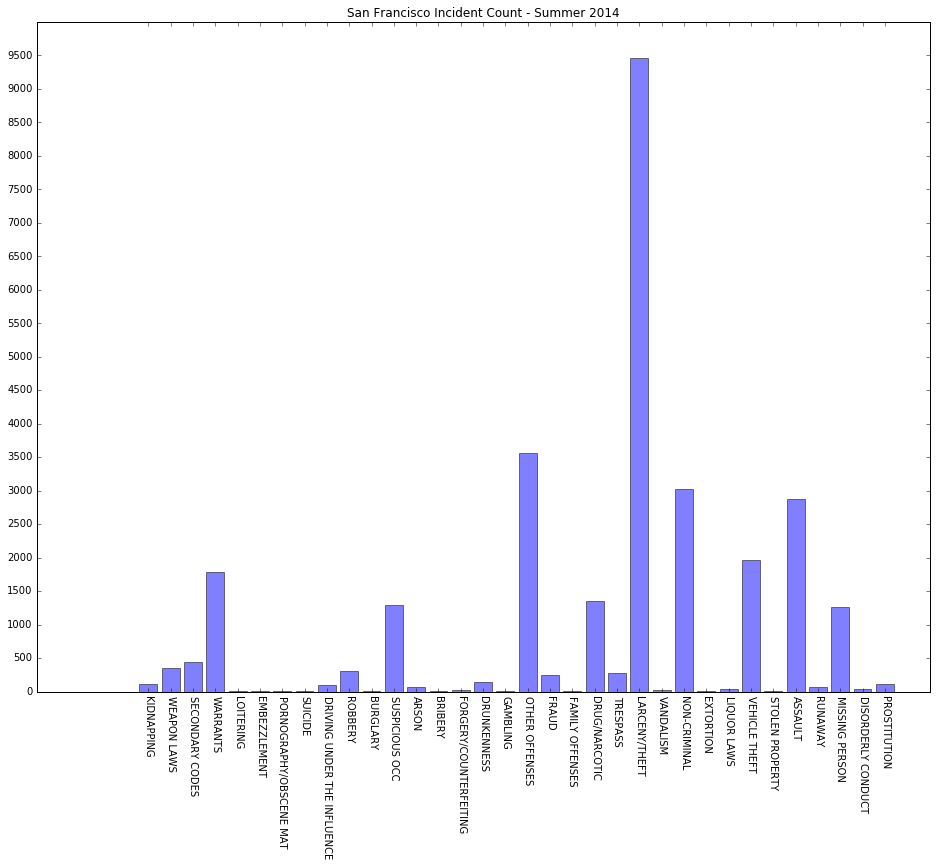

In [56]:
incidents = set(sanfranDF['Category'])

width = 2
plt.figure(figsize=(16,12))

y_pos = np.arange(len(incidents))
incident_counts = [sum(sanfranDF['Category'] == i) for i in incidents]

plt.bar(y_pos, incident_counts, align='center', alpha=0.5)
plt.xticks(y_pos, incidents, rotation=-90)
#plt.xticks(y_pos*2*width+width/2, incidents,rotation=-90)

#include the y-ticks
plt.yticks(np.arange(0,10000,500))
plt.title('San Francisco Incident Count - Summer 2014')

plt.show()

Wow! Bar chart shows that larceny/theft is by far the largest number of incidents occuring in the Summer of 2014 in San Franciso. So when and where are these occurring? Lets first look at time of day.

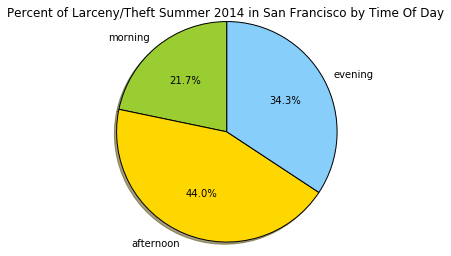

In [58]:
larcenytheftDF = sanfranDF[sanfranDF['Category'] == "LARCENY/THEFT"]

labels = 'morning', 'afternoon', 'evening'
sizes = [sum(larcenytheftDF['TimeOfDay'] == t) for t in labels]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percent of Larceny/Theft Summer 2014 in San Francisco by Time Of Day')
 
plt.axis('equal')
plt.show()

So a high percentage of Larceny/Theft is not happening not only under the cover of night but in the afternoon as well. So is there a specific day that it is occuring on?

[1233, 1237, 1228, 1235, 1445, 1583, 1505]


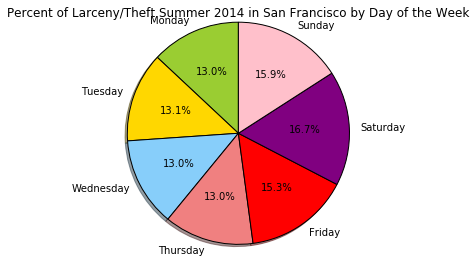

In [60]:
larcenytheftDF = sanfranDF[sanfranDF['Category'] == "LARCENY/THEFT"]

labels = 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
sizes = [sum(larcenytheftDF['DayOfWeek'] == t) for t in labels]
print sizes
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'purple', 'pink']
#cmap = plt.cm.prism
#colors = cmap(np.linspace(0., 1., len(labels)))
explode = (0, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percent of Larceny/Theft Summer 2014 in San Francisco by Day of the Week')
 
plt.axis('equal')
plt.show()